In [43]:
import os
import cv2
import mediapipe as mp
import pandas as pd

In [44]:
path = '../raw_data/paper/'
paper_image_files = []

for filename in os.listdir(path):
    f = os.path.join(path, filename)
    if os.path.isfile(f):
        paper_image_files.append(f)
len(paper_image_files)

712

In [57]:
mp_hands = mp.solutions.hands
hands_list = []

In [74]:
with mp_hands.Hands(static_image_mode=True,
                    max_num_hands=2,
                    min_detection_confidence=0.5) as hands:
    for idx, file in enumerate(paper_image_files):

        # image = cv2.imread(file)
        # image = cv2.flip(cv2.imread(file), 1)
        # image = cv2.rotate(cv2.imread(file), cv2.ROTATE_90_COUNTERCLOCKWISE)
        image = cv2.rotate(cv2.imread(file), cv2.ROTATE_90_CLOCKWISE)

        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        if not results.multi_hand_landmarks:
            continue

        for hand_landmarks in results.multi_hand_landmarks:
            fingers = {'filename':file}
            for i, finger in enumerate(hand_landmarks.landmark, start=1):
                fingers[f'{i}x'] = (finger.x)
                fingers[f'{i}y'] = (finger.y)
                fingers[f'{i}z'] = (finger.z)
            hands_list.append(fingers)

In [75]:
d = len(hands_list)
d

2792

In [76]:
one = a
two = b - a 
three = c - b
four = d - c

In [77]:
one, two, three, four

(699, 700, 697, 696)

In [78]:
paper_df = pd.DataFrame(hands_list)
paper_df['target'] = 1
paper_df.shape

(2792, 65)

In [79]:
paper_df.head()

,filename,1x,1y,1z,2x,2y,2z,3x,3y,3z,...,19x,19y,19z,20x,20y,20z,21x,21y,21z,target
0,../raw_data/paper/qtYZl1WPMxaH5KQV.png,0.622052,0.012588,1.119016e-06,0.648961,0.213876,-0.106062,0.648076,0.398597,-0.191338,...,0.149719,-0.033415,-0.171773,0.059194,-0.028786,-0.195089,-0.020457,-0.019212,-0.209474,1
1,../raw_data/paper/qbWKhamyFLSmXCgZ.png,0.917708,0.638511,8.180934e-07,0.866453,0.403034,-0.024619,0.756484,0.282239,-0.041572,...,0.528159,0.740041,-0.096860,0.445862,0.720120,-0.108943,0.379078,0.701475,-0.114698,1
2,../raw_data/paper/r9sXHEyVJVCtshSA.png,0.893933,0.591824,3.036725e-07,0.754646,0.817506,0.024681,0.611733,0.849150,0.048804,...,0.474501,0.280082,-0.011465,0.382786,0.268786,-0.017161,0.304154,0.250954,-0.016108,1
3,../raw_data/paper/1uoW7QcH2qAgCTxv.png,0.959779,0.602379,7.366200e-07,0.903449,0.817890,-0.009755,0.780894,0.903157,-0.011613,...,0.577349,0.414860,-0.060976,0.494554,0.426942,-0.068049,0.427810,0.433055,-0.069155,1
4,../raw_data/paper/n8IzyztMwnfa5rjf.png,0.846137,0.352476,8.384048e-07,0.809598,0.574894,-0.029795,0.702763,0.673937,-0.051448,...,0.481621,0.250754,-0.121615,0.400453,0.279593,-0.133520,0.331679,0.306381,-0.138129,1


In [80]:
paper_df.to_csv('../csv/paper_df.csv', index=False)

==========================================================

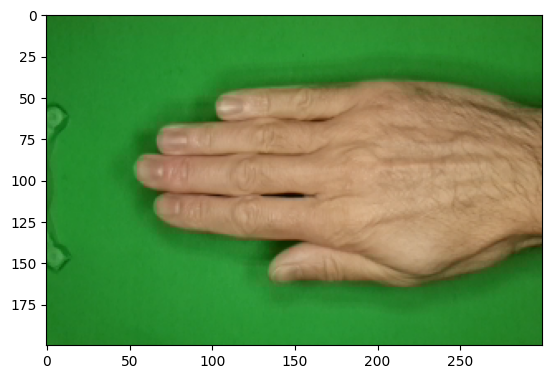

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('../raw_data/paper/dftjUImANb0Q9pMA.png'))

In [ ]:
# Python program to explain cv2.flip() method
 
# importing cv2
import cv2
 
# path
path = '../raw_data/paper/dftjUImANb0Q9pMA.png'
 
# Reading an image in default mode
src = cv2.imread(path)
 
# Window name in which image is displayed
window_name = 'Image'
 
# Using cv2.flip() method
# Use Flip code 0 to flip vertically
image = cv2.flip(src, 0)
 
# Displaying the image
cv2.imshow(window_name, image)
cv2.waitKey(0)

: 

: 